In [2]:
import pandas as pd
import numpy as np

In [3]:
from statsmodels.stats.weightstats import _zconfint_generic, _tconfint_generic

In [4]:
df = pd.read_table('water.txt')

In [43]:
df_mean = df[df['location']=='South']['hardness'].mean()

In [44]:
df_std_mean = df[df['location']=='South']['hardness'].std(ddof=1)/np.sqrt(len(df[df['location']=='South']))

In [45]:
_tconfint_generic(df_mean, df_std_mean, len(df[df['location']=='South'])-1, 0.05, 'two-sided')

(53.467198692036106, 86.07126284642544)

In [46]:
df_mean = df[df['location']=='North']['hardness'].mean()

In [47]:
df_std_mean = df[df['location']=='North']['hardness'].std(ddof=1)/np.sqrt(len(df[df['location']=='North']))

In [48]:
_tconfint_generic(df_mean, df_std_mean, len(df[df['location']=='North'])-1, 0.05, 'two-sided')

(21.42248728572426, 39.37751271427574)

In [4]:
from statsmodels.stats.proportion import proportion_confint

In [7]:
x = np.zeros(50)
x[35] = 1

In [11]:
x.mean()

0.02

In [5]:
norm_int = proportion_confint(1, 50, method='normal')
print(norm_int)

(-0.018805307081790987, 0.05880530708179099)


In [15]:
wilson_int = norm_int = proportion_confint(1, 50, method='wilson')
print(wilson_int)

(0.003539259271646236, 0.10495443589637815)


In [29]:
n = (1.95996**2)*x.mean()*(1-x.mean())/0.01**2
print n

752.9228675136


In [37]:
p_l = np.arange(0, 1, 0.05)
n_l = []

In [38]:
for p in p_l:
    n_l.append((1.95996**2)*p*(1-p)/0.01**2)

In [6]:
import matplotlib.pyplot as plt
%pylab inline  

Populating the interactive namespace from numpy and matplotlib


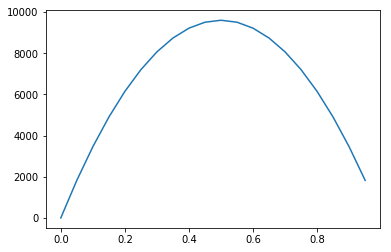

In [40]:
plt.plot(p_l, n_l)
plt.show()

In [41]:
max(n_l)

9603.608004

In [101]:
from scipy.stats import norm

In [209]:
nm = norm().ppf(0.997)
print nm

2.7477813854449926


In [162]:
random.seed()
a = np.zeros(11037)
p = np.zeros(11034)
for i in range(104):
    r = random.randint(0,11037)
    a[r] = 1

for i in range(189):
    r = random.randint(0,11034)
    p[r] = 1

In [171]:
print p.mean()-a.mean()

0.0077060239760047815


In [179]:
def ff(x1, x2, alpha = 0.05):
    z = norm().ppf(1 - alpha/2.)
    p1 = float(sum(x1)/len(x1))
    p2 = float(sum(x2)/len(x2))
    left = float(p1 - p2 - z*np.sqrt(p1*(1-p1)/len(x1) + p2*(1-p2)/len(x2)))
    right = float(p1 - p2 + z*np.sqrt(p1*(1-p1)/len(x1) + p2*(1-p2)/len(x2)))
    return (left, right)

In [181]:
print ff(p, a)

(0.004687750675049439, 0.010724297276960124)


In [183]:
v1 = a.mean()/(1-a.mean())
v2 = p.mean()/(1-p.mean())
print v2/v1

1.8320539419087138


In [186]:
a = np.zeros(11037)
p = np.zeros(11034)
for i in range(104):
    a[i] = 1
for i in range(189):
    p[i] = 1

In [195]:
def gbs(data, n_samples):
    ind = np.random.randint(0, len(data), (n_samples, len(data)))
    sample = data[ind]
    return sample

In [206]:
def st(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [207]:
random.seed(0)

odds = map(lambda x, y:(x.mean()/(1-x.mean()))/(y.mean()/(1-y.mean())), gbs(p, 1000), gbs(a, 1000))

print st(odds, 0.05)

[1.46286276 2.35093673]
